# Preparacíon de los Datos

## Extracción del Archivo Tratrado

In [3]:
import pandas as pd
import numpy as np

datos = pd.read_csv('https://raw.githubusercontent.com/adromass/Challenge_Telecom_X/refs/heads/main/Normalizado_Challenge_Telecom_X.csv')
datos.sample(3)

,id_cliente,abandono,genero,ciudadano_senior,pareja,dependientes,antiguedad_meses,servicio_telefono,multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,factura_sin_papel,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
1258,1862-QRWPE,0,0,0,1,1,48,1,0,0,...,0,0,0,0,Two year,0,Bank transfer (automatic),20.65,1057.00,0.688333
6522,9253-VIFJQ,0,1,0,1,0,65,1,1,1,...,1,0,0,0,One year,0,Credit card (automatic),67.05,4309.55,2.235000
386,0570-BFQHT,0,0,0,0,0,9,1,0,1,...,1,0,0,0,Month-to-month,0,Electronic check,80.55,653.90,2.685000


## Eliminación de Columnas Irrelevantes

In [4]:
datos.drop('id_cliente', axis=1, inplace=True)
datos.columns


Index(['abandono', 'genero', 'ciudadano_senior', 'pareja', 'dependientes',
       'antiguedad_meses', 'servicio_telefono', 'multiples_lineas',
       'servicio_internet', 'tiene_dsl', 'tiene_fibra_optica',
       'seguridad_online', 'backup_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'contrato',
       'factura_sin_papel', 'metodo_pago', 'cargo_mensual', 'cargo_total',
       'cuentas_diarias'],
      dtype='object')

## Encoding

## Verificación de la Proporción de Cancelación (abandono)

In [9]:
datos.value_counts('abandono', normalize=True).round(4)*100

abandono
0    73.46
1    26.54
Name: proportion, dtype: float64

## Balanceo de Clases

In [12]:
k= 1 + (10/3) * np.log10(datos.shape[0])
k.round()

np.float64(14.0)

In [26]:
frecuencia = pd.Series(
    pd.cut(
    datos['cargo_mensual'], 
    bins=14, include_lowest=True)
    ).value_counts()
frecuencia

cargo_mensual
(18.148999999999997, 25.429]    1511
(68.5, 75.679]                   748
(82.857, 90.036]                 666
(90.036, 97.214]                 626
(75.679, 82.857]                 614
(97.214, 104.393]                525
(54.143, 61.321]                 478
(104.393, 111.571]               447
(46.964, 54.143]                 372
(39.786, 46.964]                 311
(61.321, 68.5]                   282
(25.429, 32.607]                 179
(32.607, 39.786]                 143
(111.571, 118.75]                141
Name: count, dtype: int64

In [46]:
df_frecuencia = frecuencia.reset_index()
df_frecuencia.columns = ['rango_cargo_mensual', 'cantidad']
df_frecuencia



,rango_cargo_mensual,cantidad
0,"(18.148999999999997, 25.429]",1511
1,"(68.5, 75.679]",748
2,"(82.857, 90.036]",666
3,"(90.036, 97.214]",626
4,"(75.679, 82.857]",614
5,"(97.214, 104.393]",525
6,"(54.143, 61.321]",478
7,"(104.393, 111.571]",447
8,"(46.964, 54.143]",372
9,"(39.786, 46.964]",311


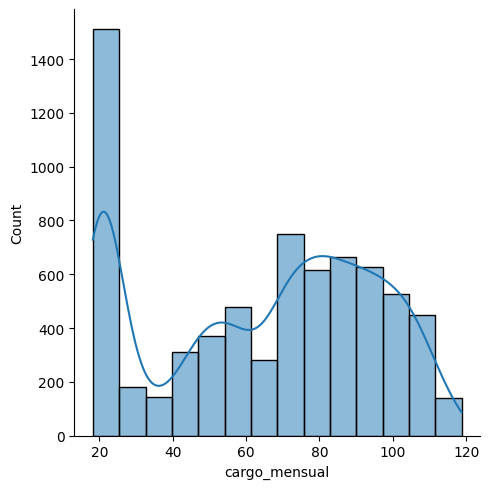

In [50]:
import seaborn as sns

ax = sns.displot(datos['cargo_mensual'],
                 bins=14, 
                kde=True)
ax

In [52]:
media_cargo_mensual = datos['cargo_mensual'].mean()
mediana_cargo_mensual = datos['cargo_mensual'].median()
datos.groupby(['abandono'])['cargo_mensual'].mean().round(4)


abandono
0    61.2651
1    74.4413
Name: cargo_mensual, dtype: float64